# The mortality intensity          



## Abstract 
Using life tables to estimate mortality intensity has become an essential practice in the insurance industry, offering a comprehensive understanding of population mortality dynamics. This project aims to utilize life tables as a tool for calculating mortality intensity, commonly referred to by various names such as Hazard Rate, the force of mortality, and Death Rate, providing insights into the expected patterns of mortality. The project includes a quick comparative analysis between China and Sweden.

## Introduction
Have you ever wondered how your life insurance is calculated? Why do people of different ages pay varying fees for the same risk or product? If you share the same curiosity as I do, this project might interest you or, at the very least, provide insights into one of the most crucial factors—mortality intensity—in life-related insurance products. This factor guides insurance companies in assessing risks, setting prices, and planning finances.

Our objective is clear: to enhance our understanding of mortality intensity. Employing a life table from a publicly available source, we calculate mortality intensity. Utilizing our computed mortality intensity, we conduct an in-depth analysis of mortality rates across different years, age groups, and genders. Subsequently, we undertake a brief comparative analysis between two distinct regions—China and Sweden. Our aim is to investigate potential significant differences in the likelihood of mortality in these regions and examine the application of mortality intensity in the insurance industry. Given the diverse demographics, financial landscapes, and healthcare characteristics, we seek to uncover insights that contribute to a deeper understanding of mortality dynamics.

## Data acquisition

To conduct a comparative analysis of mortality intensity between Sweden and China, we will acquire life table data from different sources: Statistiska centralbyrån (SCB) for Sweden and the World Health Organization (WHO) for China. It's important to note that the WHO data is recorded in five-year intervals, requiring special attention to ensure accurate integration and potentially providing less precise information.

**1. Swedish Life Table from SCB using API:**

- **Source:** Statistiska centralbyrån (SCB)
- **Method:** Utilize the SCB API to access the Swedish life table data.
- **Steps:**
  Refer to the SCB API documentation to understand available endpoints and parameters.
  Use the appropriate endpoint to fetch the Swedish life table data.
  Pay attention to variables such as age, year, and sex.

**2. Chinese Life Table from WHO using CSV File:**

- **Source:** World Health Organization (WHO)
- **Method:** Download the Chinese life table data in CSV format from the WHO website.
- **Steps:**
  Visit the WHO website and navigate to the life table data section.
  Download the CSV file containing Chinese life table data.

In [82]:
import requests
import time
from string import Template
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#https://www.scb.se/en/services/open-data-api/api-for-the-statistical-database/
# load the data according to SCB API documentation
url = 'https://api.scb.se/OV0104/v1/doris/en/ssd/BE/BE0101/BE0101I/LivslangdEttariga'
json_template = Template('{"query": [\
                  {"code": "Alder", "selection": {"filter": "item","values": ${ages}}}\
                  ,{"code": "Tid", "selection": {"filter": "item","values":[${year}]}}\
                  ]\
        ,"response": {"format": "json"}}')

ages = str(list(range(0,100)))
contents_men={}
contents_women={}
for year in range(1970,2023):
    time.sleep(0.5)
    contents_men[year]= []
    contents_women[year]= []
    resp = requests.post(url=url, data=json_template.substitute(ages=ages, year=year))
    [contents_men[year].append(item['values']) for item in resp.json()['data'] if item['key'][0] == '1']
    [contents_women[year].append(item['values']) for item in resp.json()['data'] if item['key'][0] == '2']
    
data_men = {key:pd.DataFrame(value, index=range(0,100), columns=['Mean population','Number of death','Number of deaths after the birthday','Probability of dying (per mille)','Number living at age','Observed expectation of life at age']) for key, value in contents_men.items()}
data_women = {key:pd.DataFrame(value, index=range(0,100), columns=['Mean population','Number of death','Number of deaths after the birthday','Probability of dying (per mille)','Number living at age','Observed expectation of life at age']) for key, value in contents_women.items()}


## Calculation of Mortality Intensity and Data Visualization

We obtained 50 life tables from SCB spanning the years 1970 to 2022. For the purpose of this analysis, we'll focus on six specific years: 1971, 1980, 1990, 2000, 2010, and 2022, with data sampled approximately every ten years.

Firstly, let's take a quick look at the life table for the year 1971. 

Examining the curve of deaths in the left picture, which illustrates the number of deaths against age from life tables, we observe a consistent rightward shift each year, indicating that people are experiencing mortality at relatively older ages as time progresses.

Likewise, the survival curve in the right picture, depicting the number of individuals living at each age against age from life tables, follows the same trend, suggesting a continuous increase in life expectancy year after year.

In [83]:
data_men[1971].head()

,Mean population,Number of death,Number of deaths after the birthday,Probability of dying (per mille),Number living at age,Observed expectation of life at age
0,56512,740,688,12.53,100000,71.97
1,55820,32,14,0.57,98747,71.87
2,57156,31,14,0.54,98691,70.91
3,60754,25,16,0.41,98638,69.95
4,63205,19,13,0.30,98598,68.98


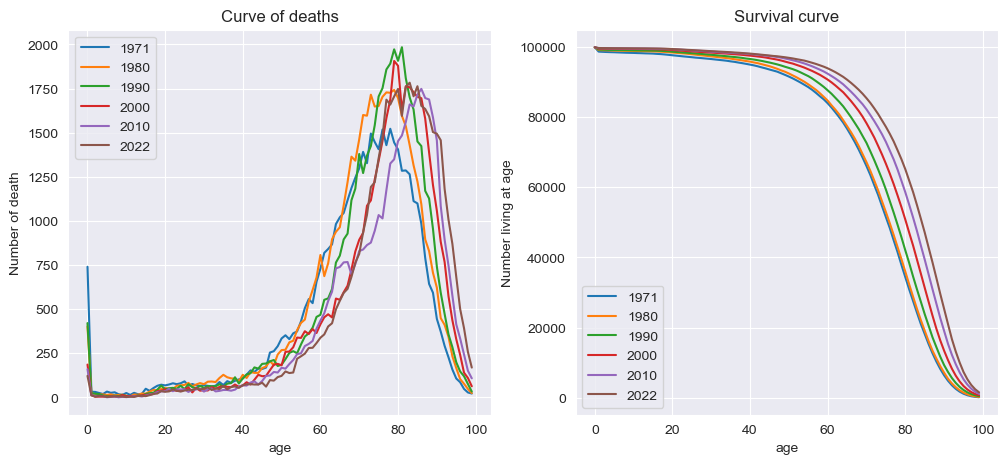

In [84]:
#use the variable "Number living at age"
column_1_men_1971 = data_men[1971].iloc[:,1]
column_1_men_1971 = column_1_men_1971.astype(int)
column_1_men_1980 = data_men[1980].iloc[:,1]
column_1_men_1980 = column_1_men_1980.astype(int)
column_1_men_1990 = data_men[1990].iloc[:,1]
column_1_men_1990 = column_1_men_1990.astype(int)

column_1_men_2000 = data_men[2000].iloc[:,1]
column_1_men_2000 = column_1_men_2000.astype(int)

column_1_men_2010 = data_men[2010].iloc[:,1]
column_1_men_2010 = column_1_men_2010.astype(int)

column_1_men_2022 = data_men[2022].iloc[:,1]
column_1_men_2022 = column_1_men_2022.astype(int)

#use the variable "Probability of dying"  
column_4_men_1971 = data_men[1971].iloc[:,4]
column_4_men_1971 = column_4_men_1971.astype(float)

column_4_men_1980 = data_men[1980].iloc[:,4]
column_4_men_1980 = column_4_men_1980.astype(float)

column_4_men_1990 = data_men[1990].iloc[:,4]
column_4_men_1990 = column_4_men_1990.astype(float)

column_4_men_2000 = data_men[2000].iloc[:,4]
column_4_men_2000 = column_4_men_2000.astype(float)

column_4_men_2010 = data_men[2010].iloc[:,4]
column_4_men_2010 = column_4_men_2010.astype(float)

column_4_men_2022 = data_men[2022].iloc[:,4]
column_4_men_2022 = column_4_men_2022.astype(float)


sns.set_style("darkgrid")

y_col1_men = np.array([column_1_men_1971,column_1_men_1980,column_1_men_1990,column_1_men_2000,column_1_men_2010,column_1_men_2022])
y_col4_men = np.array([column_4_men_1971,column_4_men_1980,column_4_men_1990,column_4_men_2000,column_4_men_2010,column_4_men_2022])

# Create a subplot with 1 row and 2 columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(column_4_men_1980.index,y_col1_men.T, label=['1971','1980', '1990', '2000' , '2010', '2022'])
plt.xlabel('age')
plt.ylabel('Number of death')
plt.title('Curve of deaths')
plt.legend(loc="upper left")
plt.subplot(1, 2, 2)
plt.plot(column_4_men_1980.index,y_col4_men.T,label=['1971','1980', '1990', '2000' , '2010', '2022'])
plt.xlabel('age')
plt.ylabel('Number living at age')
plt.title('Survival curve')
plt.legend(loc="lower left")
plt.show()

### Mortality Intensity: An Overview

Mortality intensity serves as a crucial tool for making fundamental assumptions about the behavior of individual mortality concerning the attained age. In essence, it provides a means to understand and quantify the likelihood of an individual's death within a specific timeframe.

Let's denote the random lifetime of a newborn as T. The mortality intensity function, denoted as $\mu(t)$, represents the limit as h approaches 0 of the probability that the random lifetime T is less than t + h, given that T is greater than t:

$$ \mu(t) = \lim_{{h \to 0}} P(T < t + h \,|\, T > t) $$

This expression captures the instantaneous rate of mortality at time \( t \), shedding light on the dynamics of survival probabilities.

To calculate mortality intensity, We employ formulas from the book Pitacco, Olivieri. (2010). *Introduction to Insurance Mathematics.* Springer.



In [85]:
# function s(n, year) can return the value index n in column "Number living at age"
def s_men(n, year):
    column_4 = data_men[year].iloc[:,4]
    return int(column_4[n])

def s_women(n, year):
    column_4 = data_women[year].iloc[:,4]
    return int(column_4[n])

# function mu(n) can return Age-Specific Mortality (hazard rate or mortality intensity)
def mu_men(n,year):
    if n == 0:
        value = 1 # s(0) = 100000/100000
        return 0
    else: 
        value1 = s_men(n,year)
        value2 = s_men(n -1,year)
        return -np.log(value1)+ np.log(value2)
    
def mu_women(n,year):
    if n == 0:
        value = 1 # s(0) = 100000/100000
        return 0
    else: 
        value1 = s_women(n,year)
        value2 = s_women(n -1,year)
        return -np.log(value1)+ np.log(value2)

x_values = data_men[1980].index

# calculate mortality rate for men 
y_values1971_men = [mu_men(i,1971) for i in x_values]
y_values1980_men = [mu_men(i,1980) for i in x_values]
y_values1990_men = [mu_men(i,1990) for i in x_values]
y_values2000_men = [mu_men(i,2000) for i in x_values]
y_values2010_men = [mu_men(i,2010) for i in x_values]
y_values2022_men = [mu_men(i,2022) for i in x_values]


# calculate mortality rate for men 
y_values1971_women = [mu_women(i,1971) for i in x_values]
y_values1980_women = [mu_women(i,1980) for i in x_values]
y_values1990_women = [mu_women(i,1990) for i in x_values]
y_values2000_women = [mu_women(i,2000) for i in x_values]
y_values2010_women = [mu_women(i,2010) for i in x_values]
y_values2022_women = [mu_women(i,2022) for i in x_values]

**1. Mortality intensity bewteen men and women in Sweden:**

From the graph, it can be observed that, regardless of the year, the mortality intensity curve for males has consistently been above the curve for females starting from the age of 60. In other words, from the age of 60 onwards, the likelihood of mortality for males is higher than that for females. How much higher? By examining the distance between points on the two curves, it appears that over the past 50 years, the male mortality intensity compared to the female mortality intensity has maintained a roughly consistent ratio.  This implies that the relationship between the mortality intensity of males and females has remained stable, with no significant changes.

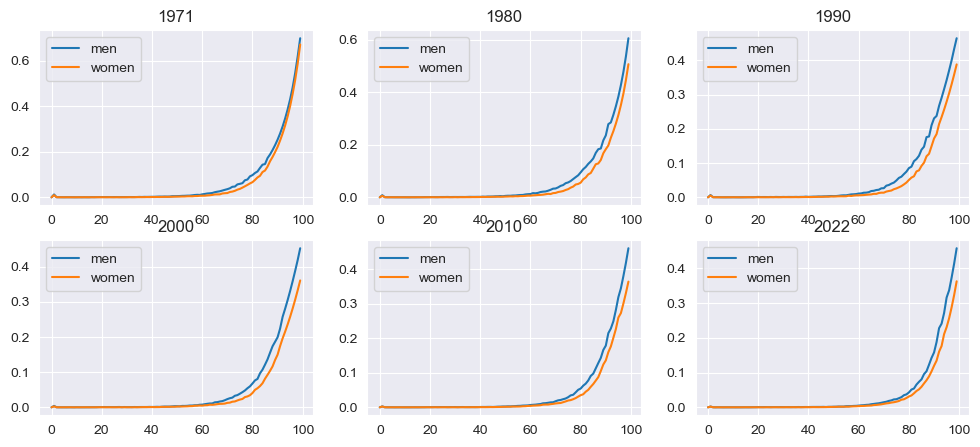

In [86]:
y_1971 = np.array([y_values1971_men,y_values1971_women])
y_1980 = np.array([y_values1980_men,y_values1980_women])
y_1990 = np.array([y_values1990_men,y_values1990_women])
y_2000 = np.array([y_values2000_men,y_values2000_women])
y_2010 = np.array([y_values2010_men,y_values2010_women])
y_2022 = np.array([y_values2022_men,y_values2022_women])

plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
plt.plot(x_values,y_1971.T, label=['men','women'])
plt.title('1971')
plt.legend(loc="upper left")
plt.subplot(2, 3, 2)
plt.plot(x_values,y_1980.T,label=['men','women'])
plt.title('1980')
plt.legend(loc="upper left")
plt.subplot(2, 3, 3)
plt.plot(x_values,y_1990.T, label=['men','women'])
plt.title('1990')
plt.legend(loc="upper left")
plt.subplot(2, 3, 4)
plt.plot(x_values,y_2000.T, label=['men','women'])
plt.title('2000')
plt.legend(loc="upper left")
plt.subplot(2, 3, 5)
plt.plot(x_values,y_2010.T, label=['men','women'])
plt.title('2010')
plt.legend(loc="upper left")
plt.subplot(2, 3, 6)
plt.plot(x_values,y_2022.T, label=['men','women'])
plt.title('2022')
plt.legend(loc="upper left")
plt.show()

**2. Mortality intensity over different period in Sweden:**

From the picture below, it can be observed that, for both males and females, the curves for the year 2022 are positioned below those of all the previous years. In other words, the mortality intensity at different ages in 2022 is lower compared to all previous years, indicating a reduced risk of death. This implies that as time progresses, the risk of death decreases.

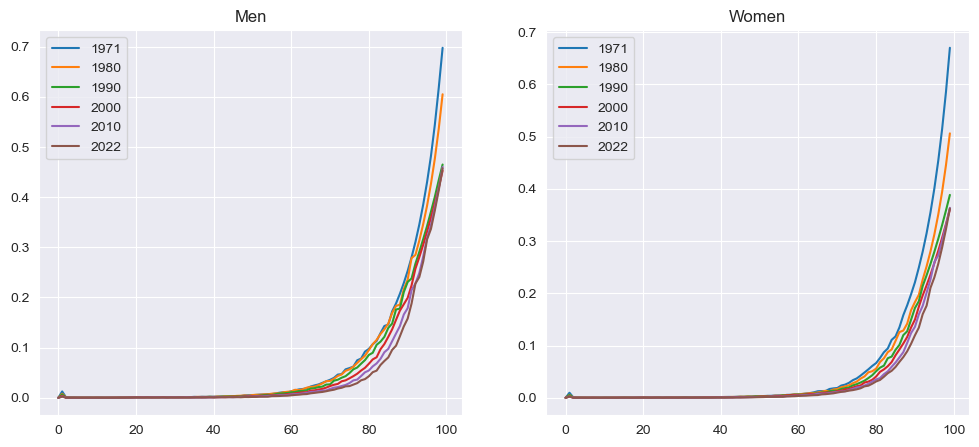

In [87]:
y_men = np.array([y_values1971_men,y_values1980_men,y_values1990_men, y_values2000_men,y_values2010_men,y_values2022_men])
y_women = np.array([y_values1971_women,y_values1980_women,y_values1990_women,y_values2000_women,y_values2010_women,y_values2022_women])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values,y_men.T, label=['1971','1980', '1990', '2000' , '2010', '2022'])
plt.title('Men')
plt.legend(loc="upper left")
plt.subplot(1, 2, 2)
plt.plot(x_values,y_women.T, label=['1971','1980', '1990', '2000' , '2010', '2022'])
plt.title('Women')
plt.legend(loc="upper left")
plt.show()

**3. Mortality intensity in China:**

In the Chinese dataset,  registration is conducted every five years, and individuals aged 85 and above are grouped into a single category without detailed recorded data. Additionally, all data is available only post-2000. Therefore, our comparative analysis is limited to the age range of 0 to 85 years, post-2000 and women. 

Examining the mortality intensity of newborns, the Chinese table reveals a consistent reduction over the years. However, compared to Sweden, the rates are slightly higher, such as 0.0063 for baby girls in China in 2019 and 0.0021 for baby girls in Sweden in 2022. In the age range from 0 to 60 years, mortality intensity remains consistently low, registering almost zero intensity for both countries. From 60 to 85 years, subtle variations in mortality intensity become apparent. Overall, Sweden tends to have lower mortality intensity, although the difference is not as pronounced. For example, at age 84, the mortality intensity for women is 0.0737 in China and 0.05168 in Sweden.

In [88]:
# load the scv-file from WHO webside
china_lifeTable = pd.read_csv(r"C:\Users\catri\OneDrive\文档\LIWUDataBehandling\Project\data_china.csv")

#create subset with data for female
year2019_women = china_lifeTable.iloc[:,[0,1,4]]
year2015_women = china_lifeTable.iloc[:,[0,1,7]]
year2010_women = china_lifeTable.iloc[:,[0,1,10]]
year2005_women = china_lifeTable.iloc[:,[0,1,13]]
year2000_women = china_lifeTable.iloc[:,[0,1,16]]

# extract only mortality parts
selected_rows2000 = year2000_women[year2000_women.iloc[:,0] == 'nMx - age-specific death rate between ages x and x+n'].copy()
selected_rows2005 = year2005_women[year2005_women.iloc[:,0] == 'nMx - age-specific death rate between ages x and x+n'].copy()
selected_rows2010 = year2010_women[year2010_women.iloc[:,0] == 'nMx - age-specific death rate between ages x and x+n'].copy()
selected_rows2015 = year2015_women[year2015_women.iloc[:,0] == 'nMx - age-specific death rate between ages x and x+n'].copy()
selected_rows2019 = year2019_women[year2019_women.iloc[:,0] == 'nMx - age-specific death rate between ages x and x+n'].copy()

# rename the age values where in original table are like 1-5 ages, convert them to numeric values
age_values = [0,4,9,14,19,24,29,34,39,44,49,54,59,64,69,74,79,84,85]
selected_rows2019.loc[:,"age"] = age_values

# change type from object to float
selected_rows2000[selected_rows2000.columns[2]] = selected_rows2000["2000.2"].astype(float)
selected_rows2005[selected_rows2005.columns[2]] = selected_rows2005["2005.2"].astype(float)
selected_rows2010[selected_rows2010.columns[2]] = selected_rows2010["2010.2"].astype(float)
selected_rows2015[selected_rows2015.columns[2]] = selected_rows2015["2015.2"].astype(float)
selected_rows2019[selected_rows2019.columns[2]] = selected_rows2019["2019.2"].astype(float)

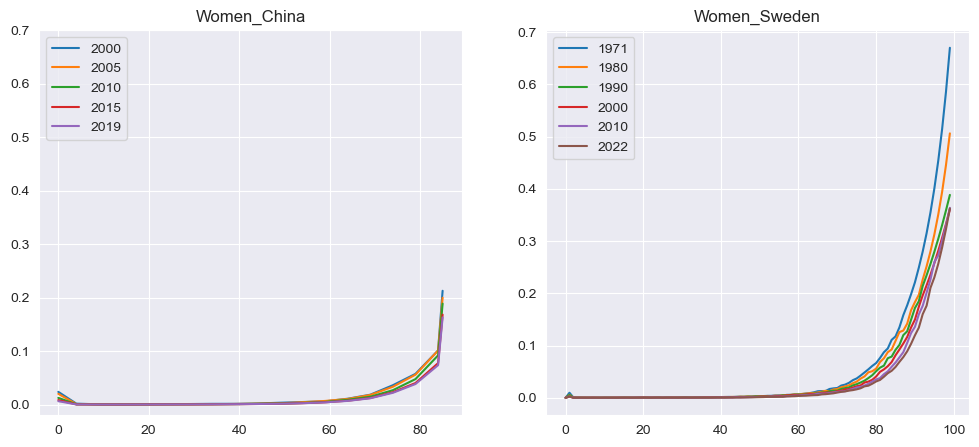

In [89]:
y_values_china = np.array([selected_rows2000["2000.2"],selected_rows2005["2005.2"],selected_rows2010["2010.2"],selected_rows2015["2015.2"],selected_rows2019["2019.2"]])
x_values_china = selected_rows2019["age"]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x_values_china,y_values_china.T, label=['2000','2005', '2010', '2015' , '2019'])
plt.title('Women_China')
plt.ylim(-0.02, 0.7)
plt.legend(loc="upper left")
plt.subplot(1, 2, 2)
plt.plot(x_values,y_women.T, label=['1971','1980', '1990', '2000' , '2010', '2022'])
plt.title('Women_Sweden')
plt.legend(loc="upper left")
plt.show()

**4. Mortality intensity in insurance:**

I have not worked in the insurance industry, but based on publicly available information, my understanding is that in China, the Insurance Association releases a unified mortality rate table, which insurance companies use as a standard to calculate their insurance products. As for Sweden, from what I found through Google, they use the SCB (Statistiska centralbyrån) table as their standard.

From the results obtained earlier, my conclusion is that the overall mortality intensity for females in China under 85 years old is comparable to that of Sweden but slightly higher. Given this, we speculated that when calculating insurance products, the data in China might be slightly higher than in Sweden. However, according to the 'China Life Insurance Mortality Table' released by the Chinese National Financial Regulatory Administration, this is not entirely the case. In pension products, the mortality intensities used are lower than Sweden, covering ages from 0 to 100 years old. In non-pension products, in line with our conclusion, the mortality intensity used under 85 years old is higher than Sweden, whereas the mortality intensity at and above 85 years old is lower than Sweden.

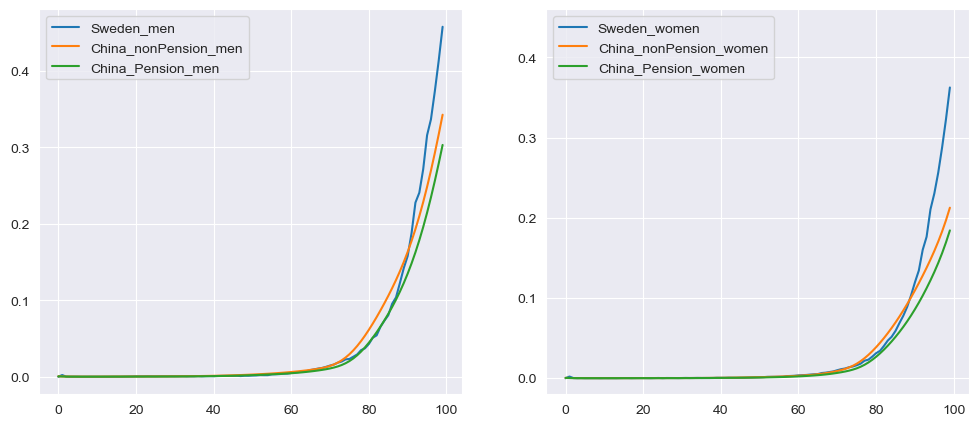

In [81]:
#load the mortality intensity table that is used in the insurance industry in China
insurance_table = pd.read_excel(r"C:\Users\catri\OneDrive\文档\LIWUDataBehandling\Project\中国人身保险经验生命表.xlsx")
x = insurance_table.iloc[:,0]

#the columns with intensities
CL3M = insurance_table.iloc[:,3]
CL4W = insurance_table.iloc[:,4]
CL5M = insurance_table.iloc[:,5]
CL6W = insurance_table.iloc[:,6]

y_values_men = np.array([y_values2022_men,CL3M[0:100],CL5M[0:100]])
y_values_women = np.array([y_values2022_women,CL4W[0:100],CL6W[0:100]])

#create plots that compare the rate between Sweden and China
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x[0:100],y_values_men.T,label=['Sweden_men','China_nonPension_men','China_Pension_men'] )
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x[0:100],y_values_women.T,label=['Sweden_women','China_nonPension_women','China_Pension_women'] )
plt.ylim(-0.02, 0.46)
plt.legend(loc="upper left")
plt.show()

# Discussion and reflections

Based on the mortality intensity and analysis we derived above, it can be said that, for both men and women in Sweden, the mortality intensity is nearly zero before the age of 60. This implies that, at this age range, if insurance products solely involve the risk of death, the premiums should be roughly the same. Beyond the age of 60, the mortality risk for males is higher compared to females, leading to higher premiums accordingly.

In the comparison between China and Sweden, due to data limitations (restricted to below 85 years and post-2000 data), the mortality rates for both countries are almost identical in the age range of 0 to 60. However, China has a slightly higher mortality rate for newborns compared to Sweden, and the mortality rate for individuals aged 60 to 85 is also slightly higher in China.

From the perspective of the usage of mortality intensity in the insurance industry, merely understanding the calculation of mortality intensity is far from sufficient for comprehending the pricing of insurance products. The mortality intensity used can vary due to differences in insurance products. Moreover, mortality intensity is just one of many parameters in insurance calculations. However, at least from this project, we have gained valuable insights into this particular parameter.